#               1995-1996 Chicago Bulls vs 2015-2016 Golden State Warriors #

One of the biggest debates in basketball is determining who was the best team in history. The Warriors have just beat the Bulls all time win record in a regular season with 73 wins. I am extremely interested in the basketball and is one of the reasons why I picked it. Being from Chicago, this topic is important to me, and I want to analyze it in a different way. I want to be able to look at the numbers behind the teams and see who was truly the better team, despite the warriors tying/maybe beating the Bull’s record tomorrow.

I’m going to first adjust for the different eras and determine how many fouls were called, on average, at each game that they played. In addition, I will do the same for the average fouls called, on average, for the league. Then, I’m going to look at the offense and defense of both teams by examining average points scored per team, average points scored against each team, field goal percentages, offensive rebounds and defense. Defense includes number of steals, blocks, and defensive rebounds. I’m also going to look into how dependent the teams were on their star players. The star player for each team was Michael Jordan, Stephen Curry for the Warriors. I’ll do that by looking into point differentials when their respective stars weren’t on the court.

*Note that all statistics are from the regular season only*

The most obvious variable to isolate to determine which team was better is the time eras in which both teams played. In two decades, a lot has changed in basketball, and it's important to note those changes before analyzing the two different teams.

In [145]:
# import packages 
import pandas as pd                   
import matplotlib.pyplot as plt       
import sys 
from itertools import cycle, islice
import math
import numpy as np
%matplotlib inline

In [76]:
#All Data copied and pasted from: http://www.basketball-reference.com/leagues/NBA_2016.html
#All Data copied and pasted from: http://www.basketball-reference.com/leagues/NBA_1996.html
#Team names with astericks signify they qualified for playoffs

#2016 Regular Season Data 
twentysixteen_data = {'Team':['Atlanta Hawks*','Boston Celtics*','Brooklyn Nets','Charlotte Hornets*','Chicago Bulls','Cleveland Cavaliers*','Dallas Mavericks*','Denver Nuggets','Detroit Pistons*','Golden State Warriors*','Houston Rockets*','Indiana Pacers*','Los Angeles Clippers*','Los Angeles Lakers','Memphis Grizzlies*','Miami Heat*','Milwaukee Bucks','Minnesota Timberwolves','New Orleans Pelicans','New York Knicks','Oklahoma City Thunder*','Orlando Magic','Philadelphia 76ers','Phoenix Suns','Portland Trail Blazers*','Sacramento Kings','San Antonio Spurs*','Toronto Raptors*','Utah Jazz','Washington Wizards','2016 League Averages'],
'Field Goals':[3168,3216,3136,3036,3165,3171,3064,3093,3111,3489,3094,3142,3141,2880,3019,3150,3145,3095,3153,3022,3372,3242,2970,3051,3167,3283,3289,3006,2957,3238,3135.5],
'Field Goal Attempts':[6923,7318,6920,6922,7170,6888,6900,7003,7087,7159,6847,6985,6759,6956,6859,6697,6740,6668,7040,6886,7082,7120,6887,7018,7040,7083,6797,6669,6593,7033,6934.96666666667],
'Field Goal %':[0.458,0.439,0.453,0.439,0.441,0.46,0.444,0.442,0.439,0.487,0.452,0.45,0.465,0.414,0.44,0.47,0.467,0.464,0.448,0.439,0.476,0.455,0.431,0.435,0.45,0.464,0.484,0.451,0.449,0.46,0.4522],
'3 Point Field Goals':[815,717,531,873,651,880,806,656,740,1077,878,663,797,639,504,498,440,455,702,610,678,636,764,738,864,660,570,708,694,709,698.433333333333],
'3 Point Field Goal Attempts':[2327,2142,1508,2410,1754,2427,2341,1943,2148,2592,2533,1889,2190,2016,1521,1480,1277,1347,1951,1762,1945,1818,2255,2117,2336,1839,1518,1915,1956,1983,1974.66666666667],
'3 Point Field Goal %':[0.35,0.335,0.352,0.362,0.371,0.363,0.344,0.338,0.345,0.416,0.347,0.351,0.364,0.317,0.331,0.336,0.345,0.338,0.36,0.346,0.349,0.35,0.339,0.349,0.37,0.359,0.375,0.37,0.355,0.358,0.352833333333333],
'2 Point Field Goals':[2353,2499,2605,2163,2514,2291,2258,2437,2371,2412,2216,2479,2344,2241,2515,2652,2705,2640,2451,2412,2694,2606,2206,2313,2303,2623,2719,2298,2263,2529,2437.06666666667],
'2 point Field Goal Attempts':[4596,5176,5412,4512,5416,4461,4559,5060,4939,4567,4314,5096,4569,4940,5338,5217,5463,5321,5089,5124,5137,5302,4632,4901,4704,5244,5279,4754,4637,5050,4960.3],
'2 Point Field Goal %':[0.512,0.483,0.481,0.479,0.464,0.514,0.495,0.482,0.48,0.528,0.514,0.486,0.513,0.454,0.471,0.508,0.495,0.496,0.482,0.471,0.524,0.492,0.476,0.472,0.49,0.5,0.515,0.483,0.488,0.501,0.491633333333333],
'Free Throws':[1282,1520,1286,1534,1354,1333,1454,1513,1399,1366,1671,1430,1490,1583,1584,1406,1392,1753,1415,1411,1616,1249,1284,1431,1424,1514,1342,1702,1402,1349,1449.63333333333],
'Free Throw Attempts':[1638,1929,1699,1941,1720,1783,1831,1974,2095,1790,2407,1872,2152,2028,2024,1889,1863,2213,1823,1753,2067,1649,1850,1905,1889,2089,1672,2190,1885,1849,1915.63333333333],
'Free Throw %':[0.783,0.788,0.757,0.79,0.787,0.748,0.794,0.766,0.668,0.763,0.694,0.764,0.692,0.781,0.783,0.744,0.747,0.792,0.776,0.805,0.782,0.757,0.694,0.751,0.754,0.725,0.803,0.777,0.744,0.73,0.757966666666667],
'Offensive Rebounds':[679,950,863,734,907,873,751,940,1021,816,930,847,721,878,916,807,858,821,782,850,1071,843,777,943,948,868,770,836,880,743,854.1],
'Defensive Rebounds':[2772,2733,2614,2869,2889,2777,2781,2719,2777,2972,2601,2779,2727,2645,2497,2811,2559,2587,2712,2788,2916,2709,2605,2733,2782,2760,2831,2724,2665,2688,2734.06666666667],
'Total Rebounds':[3451,3683,3477,3603,3796,3650,3532,3659,3798,3788,3531,3626,3448,3523,3413,3618,3417,3408,3494,3638,3987,3552,3382,3676,3730,3628,3601,3560,3545,3431,3588.16666666667],
'Assists':[2100,1981,1829,1778,1870,1861,1813,1858,1594,2373,1821,1741,1873,1478,1697,1709,1895,1916,1818,1682,1883,1933,1765,1701,1748,2009,2010,1536,1555,2005,1827.73333333333],
'Steals':[747,752,627,596,495,551,560,609,573,689,821,742,709,593,725,553,672,656,633,467,603,673,680,632,562,733,677,636,631,708,643.5],
'Blocks':[487,348,332,438,470,317,306,395,304,498,430,391,460,337,350,531,475,375,342,466,487,417,495,313,380,368,485,449,425,323,406.466666666667],
'Turnovers':[1226,1127,1212,1030,1141,1114,1047,1202,1110,1245,1307,1219,1063,1124,1090,1155,1247,1231,1102,1099,1305,1155,1343,1410,1200,1326,1071,1073,1224,1186,1179.46666666667],
'Personal Fouls':[1569,1796,1476,1487,1545,1666,1595,1723,1557,1701,1790,1641,1746,1662,1783,1502,1695,1696,1713,1616,1691,1701,1780,1858,1782,1676,1433,1610,1655,1708,1661.76666666667],
'Points':[8433,8669,8089,8479,8335,8555,8388,8355,8361,9421,8737,8377,8569,7982,8126,8204,8122,8398,8423,8065,9038,8369,7988,8271,8622,8740,8490,8422,8010,8534,8419],
'Points Per Game':[102.8,105.7,98.6,103.4,101.6,104.3,102.3,101.9,102,114.9,106.5,102.2,104.5,97.3,99.1,100,99,102.4,102.7,98.4,110.2,102.1,97.4,100.9,105.1,106.6,103.5,102.7,97.7,104.1,102.7]}

#1996 Regular Season Data
ninetysix_data = {'Team':['Atlanta Hawks*','Boston Celtics','Charlotte Hornets','Chicago Bulls*','Cleveland Cavaliers*','Dallas Mavericks','Denver Nuggets','Detroit Pistons*','Golden State Warriors','Houston Rockets*','Indiana Pacers*','Los Angeles Clippers','Los Angeles Lakers*','Miami Heat*','Milwaukee Bucks','Minnesota Timberwolves','New Jersey Nets','New York Knicks*','Orlando Magic*','Philadelphia 76ers','Phoenix Suns*','Portland Trail Blazers*','Sacramento Kings*','San Antonio Spurs*','Seattle SuperSonics*','Toronto Raptors','Utah Jazz*','Vancouver Grizzlies','Washington Bullets','1996 League Averages'],
'Field Goals':[2985,3163,3108,3293,2761,3124,3001,2810,3056,3078,2979,3126,3216,2902,3034,2974,2881,3003,3203,2796,3159,3064,2971,3148,3074,3084,3129,2772,3202,3037.79310344828],
'Field Goal Attempts':[6665,6942,6618,6892,5998,7431,6657,6122,6700,6638,6205,6618,6706,6348,6490,6481,6750,6382,6640,6418,6673,6688,6494,6602,6401,6598,6417,6483,6618,6575],
'Field Goal %':[0.448,0.456,0.47,0.478,0.46,0.42,0.451,0.459,0.456,0.464,0.48,0.472,0.48,0.457,0.467,0.459,0.427,0.471,0.482,0.436,0.473,0.458,0.457,0.477,0.48,0.467,0.488,0.428,0.484,0.462241379310345],
'3 Point Field Goals':[566,539,584,544,596,735,397,545,447,637,363,509,477,552,357,279,250,485,622,492,327,480,462,518,581,414,377,372,493,482.758620689655],
'3 Point Field Goal Attempts':[1595,1453,1520,1349,1582,2039,1148,1350,1199,1761,973,1374,1359,1458,1056,857,746,1285,1645,1438,984,1358,1194,1320,1596,1168,1013,1129,1212,1315.89655172414],
'3 Point Field Goal %':[0.355,0.371,0.384,0.403,0.377,0.36,0.346,0.404,0.373,0.362,0.373,0.37,0.351,0.379,0.338,0.326,0.335,0.377,0.378,0.342,0.332,0.353,0.387,0.392,0.364,0.354,0.372,0.329,0.407,0.365310344827586],
'2 Point Field Goals':[2419,2624,2524,2749,2165,2389,2604,2265,2609,2441,2616,2617,2739,2350,2677,2695,2631,2518,2581,2304,2832,2584,2509,2630,2493,2670,2752,2400,2709,2555.03448275862],
'2 point Field Goal Attempts':[5070,5489,5098,5543,4416,5392,5509,4772,5501,4877,5232,5244,5347,4890,5434,5624,6004,5097,4995,4980,5689,5330,5300,5282,4805,5430,5404,5354,5406,5259.10344827586],
'2 Point Field Goal %':[0.477,0.478,0.495,0.496,0.49,0.443,0.473,0.475,0.474,0.501,0.5,0.499,0.512,0.481,0.493,0.479,0.438,0.494,0.517,0.463,0.498,0.485,0.473,0.498,0.519,0.492,0.509,0.448,0.501,0.486241379310345],
'Free Throws':[1523,1630,1631,1495,1355,1426,1614,1657,1775,1611,1823,1392,1529,1553,1412,1797,1672,1480,1543,1662,1907,1537,1759,1663,1843,1412,1769,1446,1511,1600.93103448276],
'Free Throw Attempts':[2012,2284,2119,2004,1775,1975,2173,2206,2340,2106,2416,1984,2049,2187,1914,2314,2244,1954,2232,2263,2472,2321,2407,2261,2424,1953,2302,1998,2076,2164.31034482759],
'Free Throw %':[0.757,0.714,0.77,0.746,0.763,0.722,0.743,0.751,0.759,0.765,0.755,0.702,0.746,0.71,0.738,0.777,0.745,0.757,0.691,0.734,0.771,0.662,0.731,0.736,0.76,0.723,0.768,0.724,0.728,0.739586206896552],
'Offensive Rebounds':[1182,1050,987,1247,867,1408,1057,884,1173,919,1010,979,995,999,973,985,1350,829,966,1031,1009,1160,1114,937,954,1071,993,957,930,1035.03448275862],
'Defensive Rebounds':[2148,2427,2256,2411,2055,2379,2487,2440,2285,2455,2262,2190,2303,2495,2164,2271,2503,2449,2401,2161,2501,2577,2345,2586,2449,2213,2373,2170,2327,2347.68965517241],
'Total Rebounds':[3330,3477,3243,3658,2922,3787,3544,3324,3458,3374,3272,3169,3298,3494,3137,3256,3853,3278,3367,3192,3510,3737,3459,3523,3403,3284,3366,3127,3257,3382.72413793103],
'Assists':[1609,1792,1907,2033,1818,1913,1851,1610,1889,1982,1917,1672,2080,1752,1755,1867,1752,1822,2080,1629,2001,1760,1829,2044,1999,1927,2139,1706,1815,1860.34482758621],
'Steals':[771,653,582,745,674,642,521,506,706,645,579,703,722,574,582,650,627,645,663,643,623,594,643,645,882,745,667,728,592,653.51724137931],
'Blocks':[319,406,277,345,340,342,597,352,470,476,323,411,516,439,307,481,571,377,406,420,331,417,436,536,393,493,418,333,506,415.103448275862],
'Turnovers':[1228,1302,1241,1175,1073,1270,1265,1215,1343,1245,1335,1355,1163,1394,1295,1426,1375,1272,1160,1414,1207,1377,1442,1195,1441,1544,1215,1347,1327,1297.96551724138],
'Personal Fouls':[1714,2041,1815,1807,1685,1836,1882,1953,1835,1753,2031,2008,1702,2158,1943,1994,1880,1864,1709,1777,1776,1859,2131,1820,1967,1987,2046,1852,1981,1889.86206896552],
'Points':[8059,8495,8431,8625,7473,8409,8013,7822,8334,8404,8144,8153,8438,7909,7837,8024,7684,7971,8571,7746,8552,8145,8163,8477,8572,7994,8404,7362,8408,8159.27586206897],
'Points Per Game':[98.3,103.6,102.8,105.2,91.1,102.5,97.7,95.4,101.6,102.5,99.3,99.4,102.9,96.5,95.6,97.9,93.7,97.2,104.5,94.5,104.3,99.3,99.5,103.4,104.5,97.5,102.5,89.8,102.5,99.5]}

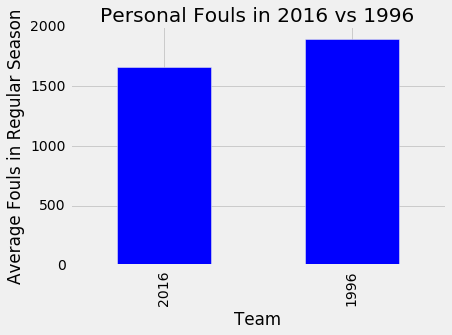

In [98]:
#making into dataframe
twentysixteen_table = pd.DataFrame(twentysixteen_data)
ninetysix_table = pd.DataFrame(ninetysix_data)

#selecting league data regarding personal fouls 
league_2016_f = twentysixteen_table.set_index('Team')
league_2016_avg_pf = league_2016_f['Personal Fouls']
league_2016_pf = league_2016_avg_pf[30:31]

#selecting league data 
league_1996_f = ninetysix_table.set_index('Team')
league_1996_avg_pf = league_1996_f['Personal Fouls']
league_1996_pf = league_1996_avg_pf[29:30]

#combining warriors and bulls dataframe 
comparison = [league_2016_pf,league_1996_pf]
table_pf = pd.concat(comparison)

#renaming the years so it isn't as long
rn = {"2016 League Averages": "2016","1996 League Averages": "1996"}
new_table_pf = table_pf.rename(rn) 

#formatting chart 
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_title('Personal Fouls in 2016 vs 1996')
ax.set_ylabel('Average Fouls in Regular Season')
new_table_pf.plot(kind = 'bar')

There are more personal fouls in 1996 than in 2016. This could be due to the physicality in years before. There was also more driving and more post up game given the way basketball was played back then. However, the game has changed a lot from Steph's emphasis on perimeter shooting. More players are attempting 3 point shots and ball movement across the perimeter, changing the pace and style of the game. Thus, it makes sense that we see these statistics in the number of fouls we see. 

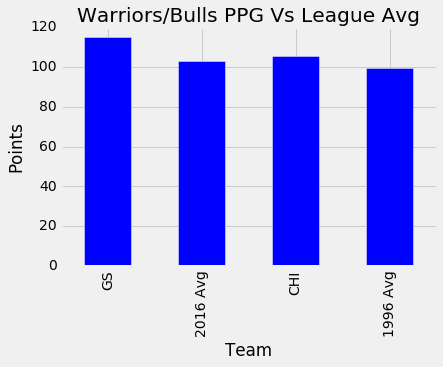

In [100]:
#selecting warriors and league data regarding ppg
warriors = twentysixteen_table.set_index('Team')
teams_2016_ppg = warriors['Points Per Game']
warriors_ppg = teams_2016_ppg[9:10]
league_2016_ppg = teams_2016_ppg[30:31]

#selecting bulls and league data regarding ppg
bulls = ninetysix_table.set_index('Team')
teams_1996_ppg = bulls['Points Per Game']
bulls_ppg = teams_1996_ppg[3:4]
league_1996_ppg = teams_1996_ppg[29:30]

#combining warriors and bulls dataframe regarding ppg
comparison = [warriors_ppg,league_2016_ppg,bulls_ppg,league_1996_ppg]
table_ppg = pd.concat(comparison)

#renaming the years so it isn't as long
rn = {"Golden State Warriors*": "GS","2016 League Averages": "2016 Avg","Chicago Bulls*": 'CHI',"1996 League Averages": "1996 Avg"}
new_table_ppg = table_ppg.rename(rn)

#formatting chart 
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_title('Warriors/Bulls PPG Vs League Avg')
ax.set_ylabel('Points')
new_table_ppg.plot(kind = 'bar')

From the graph, you can see that offensively, Golden State performed much better than the league average (12% higher) while Chicago (6% higher) only performed half of that, relative to the average. While offense is very important, the  defensive tactics of each team are also very important to consider. 

# Defense #

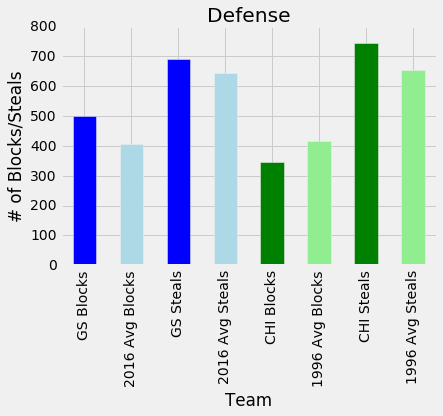

In [147]:
#selecting warriors and league data regarding blocks and steals 
warriors_def = twentysixteen_table.set_index('Team')
#blocks
teams_2016_blk = warriors_def['Blocks']
warriors_blocks = teams_2016_blk[9:10] #total number of blocks warriors has had in the 2016 season
warriors_blocks.rename({'Golden State Warriors*':'GS Blocks'}, inplace = True) #rename 
league_2016_blk = teams_2016_blk[30:31] #average total number of blocks league had in the 2016 season
league_2016_blk.rename({'2016 League Averages':'2016 Avg Blocks'}, inplace = True) #rename 

#steals
teams_2016_stl = warriors_def['Steals']
warriors_steals = teams_2016_stl[9:10] #total number of steals warriors has had in the 2016 season
warriors_steals.rename({'Golden State Warriors*':'GS Steals'}, inplace = True) #rename 
league_2016_stl = teams_2016_stl[30:31] #average total number of steals league had in the 2016 season
league_2016_stl.rename({'2016 League Averages':'2016 Avg Steals'}, inplace = True) #rename

#selecting bulls and league data regarding ppg
bulls_def = ninetysix_table.set_index('Team')
#blocks
teams_1996_blk = bulls_def['Blocks']
bulls_blocks = teams_1996_blk[3:4] #total number of blocks bulls had in the 1996 season
bulls_blocks.rename({'Chicago Bulls*':'CHI Blocks'},inplace = True) #rename
league_1996_blk = teams_1996_blk[29:30] #total number of blocks league had in the 1996 season
league_1996_blk.rename ({'1996 League Averages':'1996 Avg Blocks'}, inplace = True) #rename 

#steals
teams_1996_stl = bulls_def['Steals'] 
bulls_steals = teams_1996_stl[3:4] #total number of steals bulls had in the 1996 season
bulls_steals.rename({'Chicago Bulls*':'CHI Steals'},inplace = True) #rename
league_1996_stl = teams_1996_stl[29:30] #total number of steals league had in the 1996 season
league_1996_stl.rename ({'1996 League Averages':'1996 Avg Steals'}, inplace = True) #rename 

#combining warriors and bulls dataframe regarding blocks and steals
comparison = [warriors_blocks,league_2016_blk,warriors_steals,league_2016_stl,bulls_blocks,league_1996_blk,bulls_steals,league_1996_stl]
table_def = pd.concat(comparison)

#formatting chart 
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
ax.set_title('Defense')
ax.set_ylabel('# of Blocks/Steals')
my_colors = list(islice(cycle(['b', '#ADD8E6', 'b', '#ADD8E6', 'g', '#90EE90', 'g', '#90EE90']), None, len(table_def)))
table_def.plot(kind = 'bar',color = my_colors)

After adjusting for the way different eras have played, Chicago's steals are much higher than the league average both in 1996 but as well as 2016. However, Golden State has performed much higher on both steals and blocks. After also analyzing both teams offense, Steph has lead the league with shooting efficiency. Looking purely at the numbers, it would be safe to conclude that the 2015-2016 Warriors are better than the 1995-1996 Bulls. However, for the warriors to conclude a historic season, they need to beat OKC in the western conference finals as well as the Cavs in the finals this year. 